[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/dark-theme/deep_learning_ch3.ipynb)

In [0]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0  

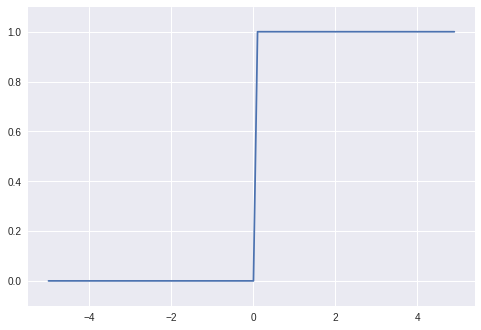

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

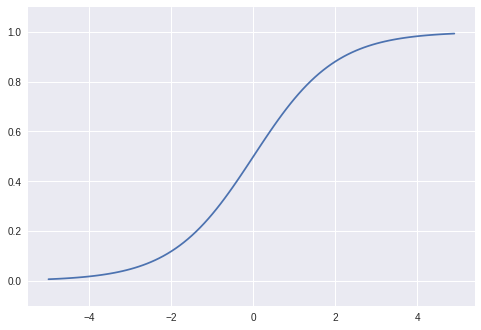

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

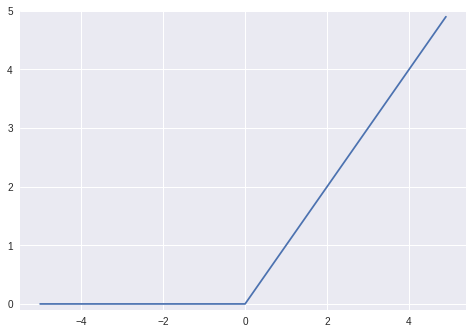

In [0]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)
plt.show()


In [0]:
def init_network():
  network =[]
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, w1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, w2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, w3) + b3
  y = identity_function(a3)
  
  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


In [0]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)


[0.01821127 0.24519181 0.73659691]


In [0]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
np.sum(y)

1.0

In [0]:
import sys, os
sys.path.append(os.pardir)

In [0]:
def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load.mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
    
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(x, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(x, W3) + b3
  y = softmax(a3)
  
  return y

In [0]:
x, t = get_data()
network = init_network()

accuracy.cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuacy.cnt += 1
    
print("Accuracy:" + str(float(accuracy.cnt) / len(x)))
